# Lecture 23: Logistic Regression - Diganostics

---

## Ex-Ante Diagnostics

The example below employs the Indian Time Use Survey to model the choice of shopping channel (no-shopping, in-store, online, both) as logistic regression, accounting for individual specific variables (socio-demographics and socio-economic parameters).

In [ ]:
# Load necessary libraries
library(tidyr)
library(dplyr)
library(mlogit)
library(ggplot2)
options(repr.plot.width = 12, repr.plot.height = 8)

In [2]:
# 2024 ITUS Individual Data (model)
url  <- "https://raw.githubusercontent.com/anmpahwa/CE5540/refs/heads/main/resources/ITUS_IND_BD.csv"
data <- read.csv(url) # Loading Data
str(data)

'data.frame':	454192 obs. of  55 variables:
 $ Unique_ID        : chr  "2024-30010-1-241-17-13-11-2-2420-4-1-1" "2024-30010-1-241-17-13-11-2-2420-4-10-1" "2024-30010-1-241-17-13-11-2-2420-4-10-2" "2024-30010-1-241-17-13-11-2-2420-4-11-1" ...
 $ Unique_HH_ID     : chr  "2024-30010-1-241-17-13-11-2-2420-4-1" "2024-30010-1-241-17-13-11-2-2420-4-10" "2024-30010-1-241-17-13-11-2-2420-4-10" "2024-30010-1-241-17-13-11-2-2420-4-11" ...
 $ q1               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ q2               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ q3               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ q4               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday          : int  1 1 1 0 0 0 0 0 1 1 ...
 $ weekend          : int  0 0 0 1 1 1 1 1 0 0 ...
 $ rural            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ urban            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ north            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ west             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ central          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ east

In [3]:
# Counts
counts <- data %>%
  summarise(
    None = sum(none, na.rm = TRUE),
    InStore = sum(instore, na.rm = TRUE),
    Online = sum(online, na.rm = TRUE),
    Both = sum(both, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = everything(), names_to = "channel", values_to = "count") %>%
  mutate(share = (count / sum(count)))
print(counts)

# A tibble: 4 × 3
  channel  count    share
  <chr>    <int>    <dbl>
1 None    409897 0.902   
2 InStore  39728 0.0875  
3 Online    4252 0.00936 
4 Both       315 0.000694


In [4]:
# Temporal: Quarter Counts
quarter_counts <- data %>%
  summarise(
    None_Q1 = sum(none * q1, na.rm = TRUE),
    InStore_Q1 = sum(instore * q1, na.rm = TRUE),
    Online_Q1 = sum(online * q1, na.rm = TRUE),
    Both_Q1 = sum(both * q1, na.rm = TRUE),

    None_Q2 = sum(none * q2, na.rm = TRUE),
    InStore_Q2 = sum(instore * q2, na.rm = TRUE),
    Online_Q2 = sum(online * q2, na.rm = TRUE),
    Both_Q2 = sum(both * q2, na.rm = TRUE),

    None_Q3 = sum(none * q3, na.rm = TRUE),
    InStore_Q3 = sum(instore * q3, na.rm = TRUE),
    Online_Q3 = sum(online * q3, na.rm = TRUE),
    Both_Q3 = sum(both * q3, na.rm = TRUE),

    None_Q4 = sum(none * q4, na.rm = TRUE),
    InStore_Q4 = sum(instore * q4, na.rm = TRUE),
    Online_Q4 = sum(online * q4, na.rm = TRUE),
    Both_Q4 = sum(both * q4, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = everything(), names_to = "channel_quarter", values_to = "count") %>%
  separate(channel_quarter, into = c("channel", "quarter"), sep = "_") %>%
  group_by(quarter) %>%
  mutate(share = (count / sum(count))) %>%
  ungroup() %>%
  mutate(channel = factor(channel, levels = c("None", "InStore", "Online", "Both")))

# Tabulate
table <- quarter_counts %>%
  ungroup() %>%
  select(channel, quarter, share) %>%
  pivot_wider(names_from = quarter, values_from = share)
print(table)

# A tibble: 4 × 5
  channel       Q1       Q2       Q3       Q4
  <fct>      <dbl>    <dbl>    <dbl>    <dbl>
1 None    0.910    0.902    0.899    0.898   
2 InStore 0.0761   0.0857   0.0933   0.0956  
3 Online  0.0131   0.0110   0.00699  0.00601 
4 Both    0.000713 0.000794 0.000704 0.000557


In [5]:
# Temporal: Day Counts
day_counts <- data %>%
  summarise(
    None_WD = sum(none * weekday, na.rm = TRUE),
    InStore_WD = sum(instore * weekday, na.rm = TRUE),
    Online_WD = sum(online * weekday, na.rm = TRUE),
    Both_WD = sum(both * weekday, na.rm = TRUE),

    None_WE = sum(none * weekend, na.rm = TRUE),
    InStore_WE = sum(instore * weekend, na.rm = TRUE),
    Online_WE = sum(online * weekend, na.rm = TRUE),
    Both_WE = sum(both * weekend, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = everything(), names_to = "channel_day", values_to = "count") %>%
  separate(channel_day, into = c("channel", "day"), sep = "_") %>%
  group_by(day) %>%
  mutate(share = (count / sum(count))) %>%
  ungroup() %>%
  mutate(channel = factor(channel, levels = c("None", "InStore", "Online", "Both")))

# Tabulate
table <- day_counts %>%
  ungroup() %>%
  select(channel, day, share) %>%
  pivot_wider(names_from = day, values_from = share)
print(table)

# A tibble: 4 × 3
  channel       WD       WE
  <fct>      <dbl>    <dbl>
1 None    0.907    0.892   
2 InStore 0.0838   0.0973  
3 Online  0.00900  0.0103  
4 Both    0.000636 0.000847


In [6]:
# Spatial: Sector Counts
sector_counts <- data %>%
  summarise(
    None_R = sum(none * rural, na.rm = TRUE),
    InStore_R = sum(instore * rural, na.rm = TRUE),
    Online_R = sum(online * rural, na.rm = TRUE),
    Both_R = sum(both * rural, na.rm = TRUE),

    None_U = sum(none * urban, na.rm = TRUE),
    InStore_U = sum(instore * urban, na.rm = TRUE),
    Online_U = sum(online * urban, na.rm = TRUE),
    Both_U = sum(both * urban, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = everything(), names_to = "channel_sector", values_to = "count") %>%
  separate(channel_sector, into = c("channel", "sector"), sep = "_") %>%
  group_by(sector) %>%
  mutate(share = (count / sum(count))) %>%
  ungroup() %>%
  mutate(channel = factor(channel, levels = c("None", "InStore", "Online", "Both")))

# Tabulate
table <- sector_counts %>%
  ungroup() %>%
  select(channel, sector, share) %>%
  pivot_wider(names_from = sector, values_from = share)
print(table)

# A tibble: 4 × 3
  channel        R       U
  <fct>      <dbl>   <dbl>
1 None    0.916    0.880  
2 InStore 0.0766   0.106  
3 Online  0.00706  0.0133 
4 Both    0.000473 0.00107


In [7]:
# Spatial: Tier Counts
tier_counts <- data %>%
  summarise(
    None_T1 = sum(none * tierI, na.rm = TRUE),
    InStore_T1 = sum(instore * tierI, na.rm = TRUE),
    Online_T1 = sum(online * tierI, na.rm = TRUE),
    Both_T1 = sum(both * tierI, na.rm = TRUE),

    None_T2 = sum(none * tierII, na.rm = TRUE),
    InStore_T2 = sum(instore * tierII, na.rm = TRUE),
    Online_T2 = sum(online * tierII, na.rm = TRUE),
    Both_T2 = sum(both * tierII, na.rm = TRUE),

    None_T3 = sum(none * tierIII, na.rm = TRUE),
    InStore_T3 = sum(instore * tierIII, na.rm = TRUE),
    Online_T3 = sum(online * tierIII, na.rm = TRUE),
    Both_T3 = sum(both * tierIII, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = everything(), names_to = "channel_tier", values_to = "count") %>%
  separate(channel_tier, into = c("channel", "tier"), sep = "_") %>%
  group_by(tier) %>%
  mutate(share = (count / sum(count))) %>%
  ungroup() %>%
  mutate(channel = factor(channel, levels = c("None", "InStore", "Online", "Both")))

# Tabulate
table <- tier_counts %>%
  ungroup() %>%
  select(channel, tier, share) %>%
  pivot_wider(names_from = tier, values_from = share)
print(table)

# A tibble: 4 × 4
  channel       T1       T2       T3
  <fct>      <dbl>    <dbl>    <dbl>
1 None    0.904    0.911    0.893   
2 InStore 0.0874   0.0802   0.0948  
3 Online  0.00825  0.00811  0.0117  
4 Both    0.000776 0.000471 0.000833


## Model Diagnostics

- Equally Likely Model: A baseline model that assumes all alternatives have the same probability of being chosen.   
  
    $$
    P_{ij} = 1/J \quad \ \ \forall \ \ i, j
    $$  
    
    where $I$ = number of individuals, and $J$ = number of alternatives.

- Market Share Model: A baseline model that assigns choice probabilities equal to the observed market shares of each alternative.  

    Unweighted Data - 

    $$
    P_{ij} = \frac{I_j}{I}
    $$

    where $I_j$ = number of times alternative $j$ is chosen.
    
    Weighted Data - 

    $$
    P_{ij} = \frac{\sum_{i=1}^{I} w_i y_{ij}}{\sum_{i=1}^{I} w_i} \quad \ \ \forall \ \ i, j
    $$  
  
  where $w_i$ is the weight for individual $i$, and $y_{ij} = 1$ if individual $i$ chose alternative $j$, else $0$.

- Estimated Model: The multinomial logit (MNL) model estimated using explanatory variables to predict choice probabilities.  
  
  $$
  P_{ij} = \frac{\exp(V_{ij})}{\sum_{k \in J} \exp(V_{ik})}
  $$  

  where $V_{ij}$ is the systematic utility of alternative $j$ for individual $i$.

Consequently, to assess predictive capability of the model, we evaluate log-Likelihood as follows

Unweighted Data - 

$$
LL = \sum_{i=1}^{I} \sum_{j=1}^{J} y_{ij} \ln\left(P_{ij}\right)
$$

Weighted Data -

$$
LL = \sum_{i=1}^{I} \left(I \frac{w_i}{\sum_{i=1}^{I} w_i}\right) \sum_{j=1}^{J} y_{ij} \ln\left(P_{ij}\right)
$$

To better compare the different models, we evaluate McFadden $\text{R}^2$ as follows,

- Estimated Model vs. Equally Likely Model:  
  
    $$
    R^2_{EL} = 1 - \frac{LL_{EST}}{LL_{EL}}
    $$

- Estimated Model vs. Market Share Model:  
  
    $$
    R^2_{MS} = 1 - \frac{LL_{EST}}{LL_{MS}}
    $$

Equivalently, we have adjusted McFadden $\text{R}^2$, given by,

- Estimated Model vs. Equally Likely Model:  
  
    $$
    \bar{R}^2_{EL} = 1 - \frac{LL_{EST} - K}{LL_{EL}}
    $$

- Estimated Model vs. Market Share Model:  
  
    $$
    \bar{R}^2_{MS} = 1 - \frac{LL_{EST} - K}{LL_{MS}}
    $$

    where $K$ is the number of exogenous variables in the estimated model.

In [8]:
long_data <- data %>%
  select(
    Unique_ID,
    q1, q2, q3, q4,
    weekday, weekend,
    urban, rural, 
    north, west, south, east, central, north.east,
    tierI, tierII, tierIII,
    male, female, transgender,
    gen_alpha, gen_z, millenials, gen_x, baby_boomers, silent,
    not_married, married,
    not_literate, primary, secondary, graduate_._above,
    nilf, unemployed, employed,
    family_structure, household_size,
    disadvantaged, not_disadvantaged,
    no_land, land_possessed,
    low_income, medium_income, high_income,
    no_dwelling, kutcha, pucca,
    none, instore, online, both,
    weight
  ) %>%
  # One row per individual × alternative
  pivot_longer(
    cols = c(none, instore, online, both),
    names_to = "alt", values_to = "bin"
  ) %>%
  mutate(bin = bin == 1)

model_data <- mlogit.data(
  long_data,
  choice = "bin",
  shape = "long",
  chid.var = "Unique_ID",
  alt.var = "alt"
)

In [9]:
# Esitmated Model
model <- mlogit(
    formula = bin ~ 1 | q1 + q2 + q3 +
                        weekend +
                        urban +
                        north + west + south + east + north.east +
                        tierI + tierII +
                        female + 
                        gen_alpha + gen_z + millenials + gen_x + baby_boomers +
                        married +
                        primary + secondary + graduate_._above +
                        unemployed + employed +
                        family_structure + household_size +
                        disadvantaged +
                        medium_income + high_income,
    data = model_data,
    ref = "none",
    weights = model_data$weight
    )
summary(model)


Call:
mlogit(formula = bin ~ 1 | q1 + q2 + q3 + weekend + urban + north + 
    west + south + east + north.east + tierI + tierII + female + 
    gen_alpha + gen_z + millenials + gen_x + baby_boomers + married + 
    primary + secondary + graduate_._above + unemployed + employed + 
    family_structure + household_size + disadvantaged + medium_income + 
    high_income, data = model_data, weights = model_data$weight, 
    reflevel = "none", method = "nr")

Frequencies of alternatives:choice
      none       both    instore     online 
0.90247516 0.00069354 0.08746962 0.00936168 

nr method
50 iterations, 0h:22m:6s 
g'(-H)^-1g = 5.42E-07 
gradient close to zero 

Coefficients :
                           Estimate Std. Error  z-value  Pr(>|z|)    
(Intercept):both         -7.4168560  0.6157904 -12.0444 < 2.2e-16 ***
(Intercept):instore      -3.1359745  0.0830616 -37.7548 < 2.2e-16 ***
(Intercept):online       -6.1039104  0.2871559 -21.2564 < 2.2e-16 ***
q1:both                   0.279187

In [15]:
# Model Statistics
I      <- nrow(data)
J      <- length(unique(data$choice))
K      <- length(coef(model))
W      <- model_data$weight
Y      <- model_data$bin
A      <- data %>%
            summarise(
              None = sum(none * weight, na.rm = TRUE) / sum(weight) * nrow(data),
              InStore = sum(instore * weight, na.rm = TRUE) / sum(weight) * nrow(data),
              Online = sum(online * weight, na.rm = TRUE) / sum(weight) * nrow(data),
              Both = sum(both * weight, na.rm = TRUE) / sum(weight) * nrow(data)
            ) %>%
            pivot_longer(cols = everything(), names_to = "channel", values_to = "n") %>%
            mutate(p = (n / sum(n)))
P      <- A$p[model_data$alt] 
LL_EL  <- I * log(1/J)
LL_MS  <- sum(A$n * log(A$p))
LL_MNL <- as.numeric(logLik(model))
R2_EL  <- 1 - (LL_MNL / LL_EL)
R2_MS  <- 1 - (LL_MNL / LL_MS)
AR2_EL <- 1 - ((LL_MNL - K) / LL_EL)
AR2_MS <- 1 - ((LL_MNL - K) / LL_MS)

# --- Output ---
cat("\n--- Log-likelihoods ---\n")
cat(sprintf("EL  : %0.3f\n", LL_EL))
cat(sprintf("MS  : %0.3f\n", LL_MS))
cat(sprintf("MNL : %0.3f\n", LL_MNL))
cat("\n--- McFadden R^2 ---\n")
cat(sprintf("R2 vs EL : %0.4f\n", R2_EL))
cat(sprintf("R2 vs MS : %0.4f\n", R2_MS))
cat("\n--- Adjusted McFadden R^2 ---\n")
cat(sprintf("Adj R2 vs EL : %0.4f (K = %d)\n", AR2_EL, K))
cat(sprintf("Adj R2 vs MS : %0.4f (K = %d)\n", AR2_MS, K))


--- Log-likelihoods ---
EL  : -629643.808
MS  : -159672.984
MNL : -146745.668

--- McFadden R^2 ---
R2 vs EL : 0.7669
R2 vs MS : 0.0810

--- Adjusted McFadden R^2 ---
Adj R2 vs EL : 0.7668 (K = 90)
Adj R2 vs MS : 0.0804 (K = 90)


## Ex-Post Diagnostics

After fitting a logistic regression model, it is essential to evaluate whether the underlying model assumptions are valid. These assumptions include linearity of the relationship between predictors and the log-odds of the outcome, independence of observations, absence of multicollinearity among predictors, and the correct specification of the model (i.e., no important predictors are omitted, and no unnecessary predictors are included). For multinomial logit models, the independence of irrelevant alternatives (IIA) assumption must also hold. Violations of these assumptions can undermine the validity of inference from the model, including confidence intervals, hypothesis tests, and predictions.

Residual diagnostics help us examine these assumptions. In logistic regression, common residuals include **deviance residuals** and **Pearson residuals**, which measure the difference between observed and predicted responses on different scales. Plots of residuals versus fitted values can reveal model inadequacies. Ideally, residuals should be randomly scattered around zero with no discernible pattern, suggesting that the model has adequately captured the systematic variation in the data. Systematic patterns may indicate violations of linearity in the logit, omitted variables, or model mis-specification. Large residuals or high leverage points may indicate outliers or influential observations that disproportionately affect the estimated coefficients.

If diagnostics reveal that assumptions are violated, various remedies are available. For violations of linearity in the logit, transformations of predictors (e.g., splines, polynomials) or interaction terms may be added. For multicollinearity, redundant predictors can be removed or combined using dimensionality reduction techniques. Outliers and influential observations can be investigated and addressed through robust estimation or case-specific adjustments. If the IIA assumption is violated in multinomial logit models, alternative specifications such as the nested logit or mixed logit models may be used. For poor overall model fit, additional predictors, interaction terms, or alternative link functions (e.g., probit) may improve performance.

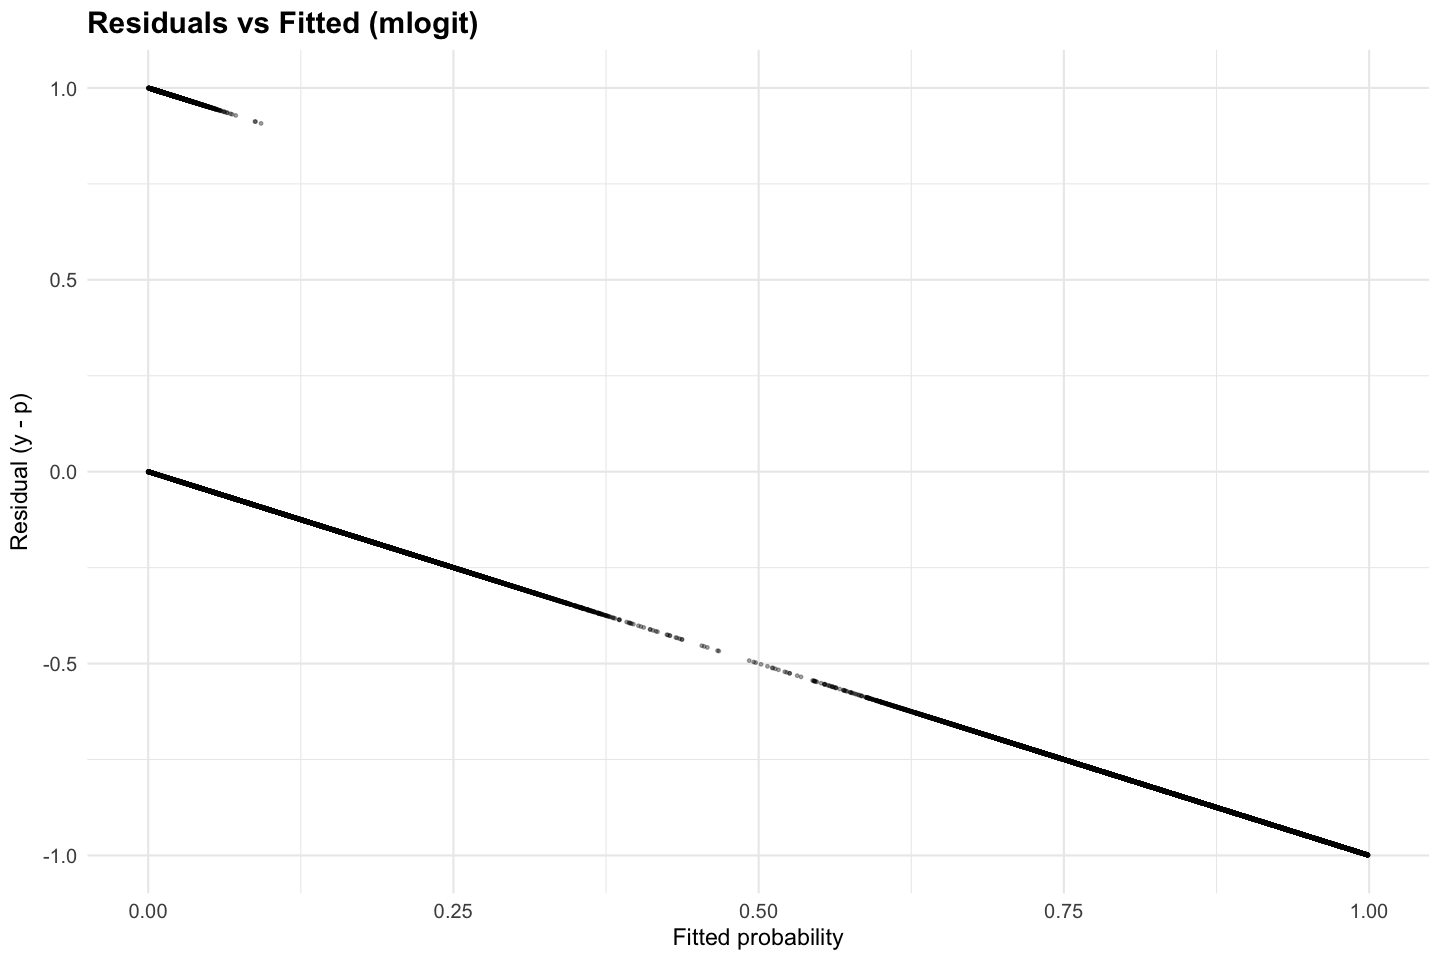

In [ ]:
# Residuals Plot
Z <- data.frame(
  p = as.vector(fitted(model, type = "probabilities", outcome = TRUE)),
  r = as.vector(residuals(model, outcome = TRUE))
)

ggplot(Z, aes(x = p, y = r)) +
  geom_point(alpha = 0.35, size = 0.7) +
  labs(
    title = "Residuals vs Fitted (mlogit)",
    x = "Fitted probability",
    y = "Residual (y - p)"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text  = element_text(size = 12)
  )